In [3]:
import pandas as pd

# Load the data
file_path = 'final_df.csv'
data = pd.read_csv(file_path, index_col='Unnamed: 0')

# Convert 'BookingEndDateTime' to datetime format
data['BookingEndDateTime'] = pd.to_datetime(data['BookingEndDateTime'])

# Ensure the data is sorted by date
data.sort_values(by='BookingEndDateTime', inplace=True)

# Display the first few rows of the data
print(data.head())


      ActivitySiteID BookingEndDateTime  Number Booked  Price (INR)
650                3         2018-04-01       1.066825    -0.444774
1500               0         2018-04-01       0.859239    -1.068811
1090               0         2018-04-01      -0.282487     0.179262
461                3         2018-04-01      -0.386280     0.803299
1875               1         2018-04-01       0.963032     0.179262


               Number Booked  Price (INR)  DayOfWeek  Hour     Month
Number Booked       1.000000    -0.194555  -0.045375   NaN -0.015167
Price (INR)        -0.194555     1.000000   0.040760   NaN -0.003295
DayOfWeek          -0.045375     0.040760   1.000000   NaN  0.021791
Hour                     NaN          NaN        NaN   NaN       NaN
Month              -0.015167    -0.003295   0.021791   NaN  1.000000


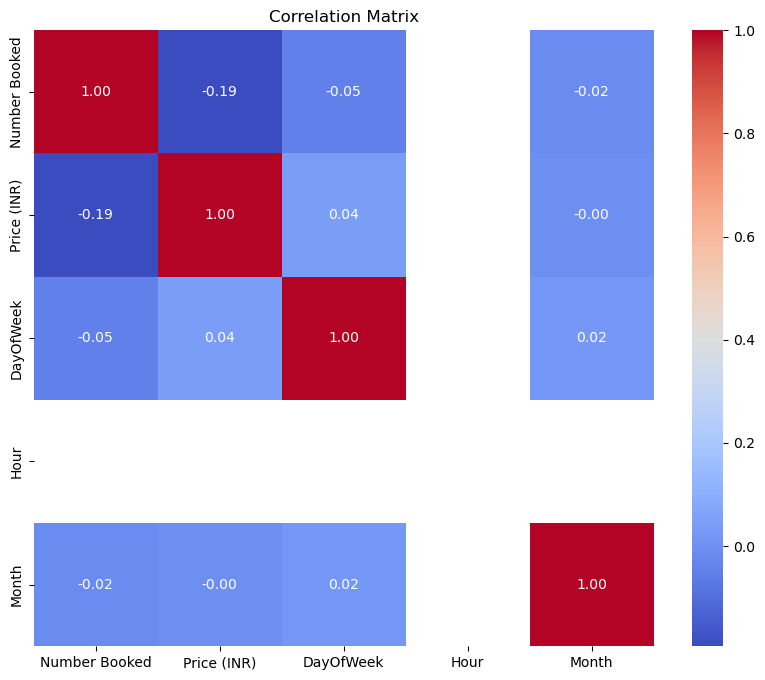

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract date-related features
data['DayOfWeek'] = data['BookingEndDateTime'].dt.dayofweek
data['Hour'] = data['BookingEndDateTime'].dt.hour
data['Month'] = data['BookingEndDateTime'].dt.month

# Correlation analysis
correlation_matrix = data[['Number Booked', 'Price (INR)', 'DayOfWeek', 'Hour', 'Month']].corr()
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [5]:
# Identify high-demand periods
high_demand_periods = data.groupby(['DayOfWeek', 'Hour']).mean()['Number Booked'].reset_index()
high_demand_periods = high_demand_periods[high_demand_periods['Number Booked'] > high_demand_periods['Number Booked'].mean()]

# Display high-demand periods
print("High-demand periods (day of week and hour):")
print(high_demand_periods)

# Example pricing strategy
def pricing_strategy(day_of_week, hour):
    if (day_of_week, hour) in high_demand_periods[['DayOfWeek', 'Hour']].values:
        return "Increase Price"
    else:
        return "Standard Price"

# Apply pricing strategy
data['Pricing Strategy'] = data.apply(lambda row: pricing_strategy(row['DayOfWeek'], row['Hour']), axis=1)

# Display a few rows with pricing strategy
print(data[['BookingEndDateTime', 'DayOfWeek', 'Hour', 'Number Booked', 'Pricing Strategy']].head())


High-demand periods (day of week and hour):
   DayOfWeek  Hour  Number Booked
1          1     0       0.275247
5          5     0       0.050262
6          6     0       0.190274
     BookingEndDateTime  DayOfWeek  Hour  Number Booked Pricing Strategy
650          2018-04-01          6     0       1.066825   Increase Price
1500         2018-04-01          6     0       0.859239   Increase Price
1090         2018-04-01          6     0      -0.282487   Increase Price
461          2018-04-01          6     0      -0.386280   Increase Price
1875         2018-04-01          6     0       0.963032   Increase Price
